<a href="https://colab.research.google.com/github/mosmtilk222/Data-Science-Projects/blob/main/power_plants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Power Plants
This project is about making a deep analysis into the power plants that provide us energy all around the world, I will explore the data to see what it is saying to us and I will explain it as clear as possible.

The project's objective is to know how we are producing energy but the main focus will be how much are we relying on fossil fuels to produce electricity.

[Link to Dataset](https://www.kaggle.com/datasets/ramjasmaurya/global-powerplants?resource=download)

Author: Aldo Cueto Piñera

E-mail: acuetopea@gmail.com

[My GitHub](https://github.com/mosmtilk222/mosmtilk222)


[My LinkedIn](https://www.linkedin.com/in/aldo-cueto-pi%C3%B1era-73b6a1224/)

Importing the libraries I will need. 
In this case the librarie to manipulate data Pandas and matplotlib to visualize the data

In [ ]:
! pip install basemap

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from itertools import chain
import numpy as np

Functions I will need

In [ ]:
# Function To classify the fuels used by the power plants

def classification(x):

  # If the fuel emmits CO2 it is classified as Dirty
  
  if  x == 'Oil' or x == 'Coal' or x == 'Gas' or x == 'Biomass' or x == 'Waste' or x == 'Petcoke':
    return 'Dirty fuel'
  else:
    return 'Clean fuel'

# Function to draw maps and plotting inside

def draw_map(m, scale=0.2):
    # Draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # Lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # Keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # Cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

Bringing the data to collab and selecting the columns I will use and also adding the column fuel_type

In [ ]:
# Statement to format float numbers

pd.options.display.float_format = '{:,.1f}'.format

# Bringing the csv file from my Drive and selecting the columns I will use/need

raw_df = pd.read_csv('/content/drive/My Drive/Datasets/powerplants.csv', usecols=[i for i in range(1,7)])

# Adding fuel_type column

raw_df['fuel_type'] = raw_df['primary_fuel'].apply(lambda x: classification(x))

# Realized there was a fuel called 'Other' so I decided to skip it

df = raw_df[(raw_df['primary_fuel'] != 'Other')]
df

,country,name of powerplant,capacity in MW,latitude,longitude,primary_fuel,fuel_type
0,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,32.3,65.1,Hydro,Clean fuel
1,Afghanistan,Kandahar DOG,10.0,31.7,65.8,Solar,Clean fuel
2,Afghanistan,Kandahar JOL,10.0,31.6,65.8,Solar,Clean fuel
3,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.0,34.6,69.5,Hydro,Clean fuel
4,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,34.6,69.7,Hydro,Clean fuel
...,...,...,...,...,...,...,...
34931,Zambia,Ndola,50.0,-13.0,28.6,Oil,Dirty fuel
34932,Zambia,Nkana,20.0,-12.8,28.2,Oil,Dirty fuel
34933,Zambia,Victoria Falls,108.0,-17.9,25.9,Hydro,Clean fuel
34934,Zimbabwe,Hwange Coal Power Plant Zimbabwe,920.0,-18.4,26.5,Coal,Dirty fuel


Knowing better my data

In [ ]:
df.dtypes

country                object
name of powerplant     object
capacity in MW        float64
latitude              float64
longitude             float64
primary_fuel           object
fuel_type              object
dtype: object

In [ ]:
df.describe(include='all')

,country,name of powerplant,capacity in MW,latitude,longitude,primary_fuel,fuel_type
count,34893,34893,"34,893.0","34,893.0","34,893.0",34893,34893
unique,167,34485,NaN,NaN,NaN,14,2
top,United States of America,Santo Antônio,NaN,NaN,NaN,Solar,Clean fuel
freq,9817,6,NaN,NaN,NaN,10665,23735
mean,NaN,NaN,163.5,32.8,-6.9,NaN,NaN
std,NaN,NaN,489.9,22.6,78.4,NaN,NaN
min,NaN,NaN,1.0,-77.8,-180.0,NaN,NaN
25%,NaN,NaN,4.9,29.2,-77.6,NaN,NaN
50%,NaN,NaN,16.6,39.7,-2.1,NaN,NaN
75%,NaN,NaN,75.0,46.2,49.7,NaN,NaN


## Which country produces the most amount of energy in the world ?

In [ ]:
# Creating new dataframe with the countries as index and their total capacity in one column

countries = df.groupby(['country'])[['capacity in MW']].sum()

# Getting the top 10 countries by capacity because if I plot all the countries will be a mess
# Also is to answer the question above

top_10 = countries.sort_values(by=['capacity in MW'], ascending= False).head(10)

top_10

,capacity in MW
country,
China,"1,415,067.4"
United States of America,"1,204,065.6"
India,"316,088.5"
Russia,"228,190.4"
Japan,"215,365.9"
Brazil,"147,442.0"
Canada,"143,561.7"
Germany,"111,283.5"
France,"110,615.9"


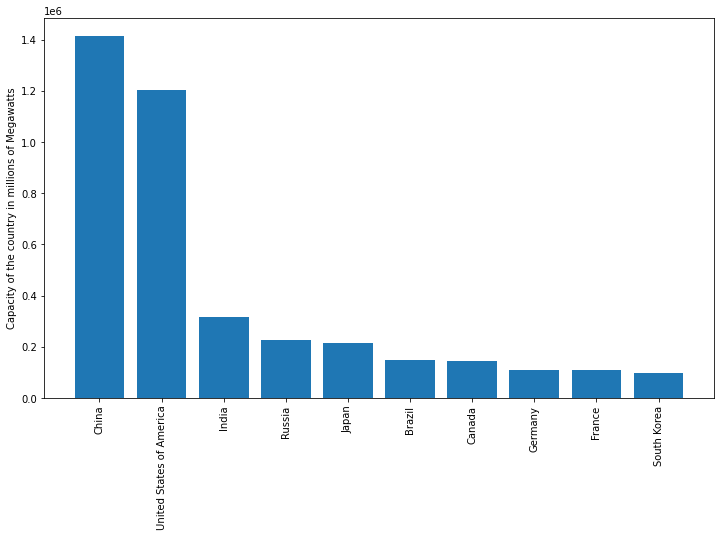

In [ ]:
# Visualization

x = top_10.index

y = top_10['capacity in MW']

plt.figure(figsize= [12, 7])

plt.bar(x, y)

plt.ylabel('Capacity of the country in millions of Megawatts')

plt.xticks(rotation= 'vertical')

plt.show()

## Which country produces the most green energy?

With **green energy** I mean that as a waste product it does not emit greenhouse gases. So I include in this solar, wind, hydro and nuclear.

In [ ]:
# Getting the plants that use clean fuel

cleanfuel_df = df[(df['fuel_type'] == 'Clean fuel')]

# Creating new dataframe with the countries as index and their total clean capacity in one column

countries = cleanfuel_df.groupby(['country'])[['capacity in MW']].sum()

# Getting the top 10

top_10 = countries.sort_values(by=['capacity in MW'], ascending= False).head(10)

top_10

,capacity in MW
country,
China,"398,245.9"
United States of America,"354,084.0"
Brazil,"112,131.7"
Canada,"108,917.4"
France,"96,853.3"
India,"83,537.7"
Japan,"76,348.9"
Russia,"74,716.4"
United Kingdom,"51,101.3"


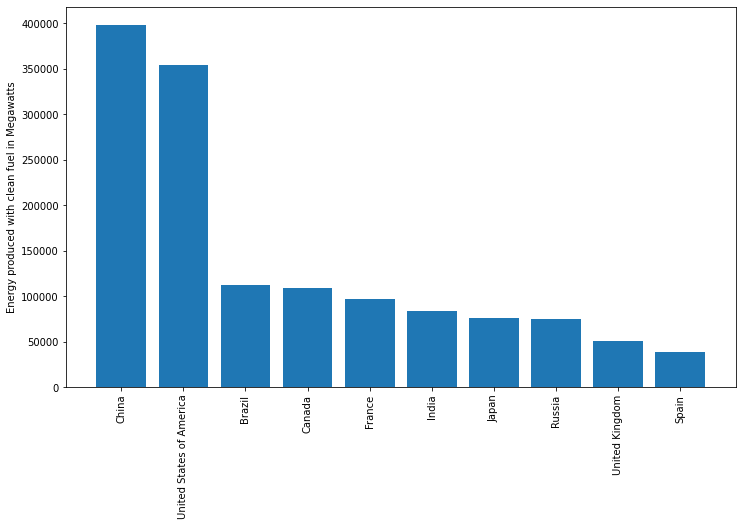

In [ ]:
# Visualization

x = top_10.index
y = top_10['capacity in MW']

plt.figure(figsize= [12, 7])

plt.bar(x, y)

plt.ylabel('Energy produced with clean fuel in Megawatts')

plt.xticks(rotation= 'vertical')

plt.show()

## Which country produces the most non-green energy?

Non-green fuels, include coal, oil, gas, waste and petcoke because to obtain energy from these fuels they have to be burned and this leads to generate CO$_2$ and other greenhouse gases.

In [ ]:
# Getting the plants that use dirty fuel

dirtyfuel_df = df[(df['fuel_type'] == 'Dirty fuel')]

# Creating new dataframe with the countries as index and their total clean capacity in one column

countries = dirtyfuel_df.groupby(['country'])[['capacity in MW']].sum()

# Getting the top 10

top_10 = countries.sort_values(by=['capacity in MW'], ascending= False).head(10)

top_10

,capacity in MW
country,
China,"1,016,821.5"
United States of America,"849,981.6"
India,"232,550.8"
Russia,"153,473.9"
Japan,"139,017.0"
Saudi Arabia,"84,204.6"
Germany,"78,298.4"
South Korea,"69,518.0"
Italy,"56,411.3"


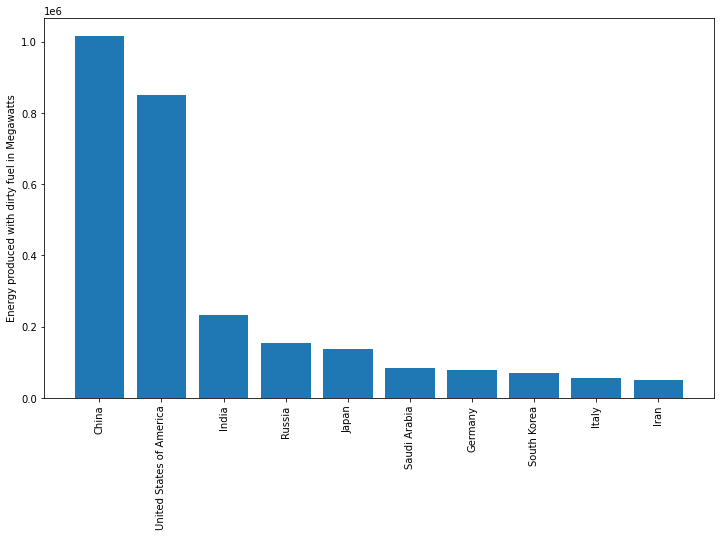

In [ ]:
# Visualization

x = top_10.index
y = top_10['capacity in MW']

plt.figure(figsize= [12, 7])

plt.bar(x, y)

plt.ylabel('Energy produced with dirty fuel in Megawatts')

plt.xticks(rotation= 'vertical')

plt.show()

## Which country has the highest percentage of clean energy capacity?

In [ ]:
## New dataframe

# Again countries as index and column with their total capacity

countries = df.groupby(['country'])[['capacity in MW']].sum()

# Adding clean_capacity and %_clean

cleanfuel_df = df[(df['fuel_type'] == 'Clean fuel')]

countries['clean_capacity'] = cleanfuel_df.groupby(['country'])[['capacity in MW']].sum()

countries['%_clean'] = (100 / countries['capacity in MW']) * countries['clean_capacity']

# Adding dirty_capacity and %_dirty

dirtyfuel_df = df[(df['fuel_type'] == 'Dirty fuel')]

countries['dirty_capacity'] = dirtyfuel_df.groupby(['country'])[['capacity in MW']].sum()

countries['%_dirty'] = (100 / countries['capacity in MW']) * countries['dirty_capacity']

countries

,capacity in MW,clean_capacity,%_clean,dirty_capacity,%_dirty
country,,,,,
Afghanistan,300.6,258.6,86.0,42.0,14.0
Albania,"1,431.0","1,431.0",100.0,NaN,NaN
Algeria,"15,873.8",694.8,4.4,"15,179.0",95.6
Angola,"1,071.2",770.6,71.9,300.6,28.1
Antarctica,7.6,1.0,13.2,6.6,86.8
...,...,...,...,...,...
Vietnam,"41,350.5","18,554.5",44.9,"22,796.0",55.1
Western Sahara,23.4,NaN,NaN,23.4,100.0
Yemen,"1,045.0",NaN,NaN,"1,045.0",100.0


In [ ]:
# Countries that produce 100 % of their energy with clean fuel

countries[(countries['%_clean'] == 100)]

,capacity in MW,clean_capacity,%_clean,dirty_capacity,%_dirty
country,,,,,
Burundi,57.2,57.2,100.0,NaN,NaN
Ethiopia,"4,023.9","4,023.9",100.0,NaN,NaN
Iceland,"2,484.6","2,484.6",100.0,NaN,NaN
Lesotho,72.0,72.0,100.0,NaN,NaN
Mali,311.5,311.5,100.0,NaN,NaN
Mozambique,"2,285.0","2,285.0",100.0,NaN,NaN
Palestine,7.6,7.6,100.0,NaN,NaN
Paraguay,"8,760.0","8,760.0",100.0,NaN,NaN
Saint Lucia,3.0,3.0,100.0,NaN,NaN


In [ ]:
## Realized the countries that produce most of their energy with clean fuel were small countries 

# So to answer this question with bigger countries and also more known I get countries with more that 10,000 MW of capacity

big_countries = countries[(countries['capacity in MW'] > 10000)]

# Getting the top 10 by the percentage of their capacity produced with clean fuel

top_10 = big_countries.sort_values(by=['%_clean'], ascending= False).head(10)

top_10

,capacity in MW,clean_capacity,%_clean,dirty_capacity,%_dirty
country,,,,,
Switzerland,"13,118.0","13,118.0",100.0,NaN,NaN
Norway,"32,551.0","31,097.0",95.5,"1,454.0",4.5
Sweden,"26,418.7","23,282.0",88.1,"3,136.7",11.9
France,"110,615.9","96,853.3",87.6,"13,762.6",12.4
Austria,"11,227.1","9,160.1",81.6,"2,067.0",18.4
Brazil,"147,442.0","112,131.7",76.1,"35,310.3",23.9
Canada,"143,561.7","108,917.4",75.9,"34,644.3",24.1
Colombia,"10,924.0","6,790.0",62.2,"4,134.0",37.8
Belgium,"13,404.8","8,310.6",62.0,"5,094.2",38.0


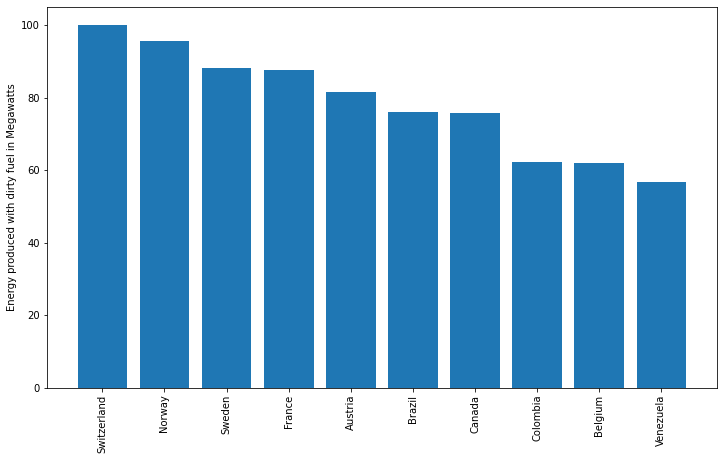

In [ ]:
# Visualization

x = top_10.index

y = top_10['%_clean']

plt.figure(figsize= [12, 7])

plt.bar(x, y)

plt.ylabel('Energy produced with dirty fuel in Megawatts')

plt.xticks(rotation= 'vertical')

plt.show()

## And which have the lowest?

In [ ]:
# Getting the top 10 by their percentage of energy produced with dirty fuel

top_10 = big_countries.sort_values(by=['%_dirty'], ascending= False).head(10)

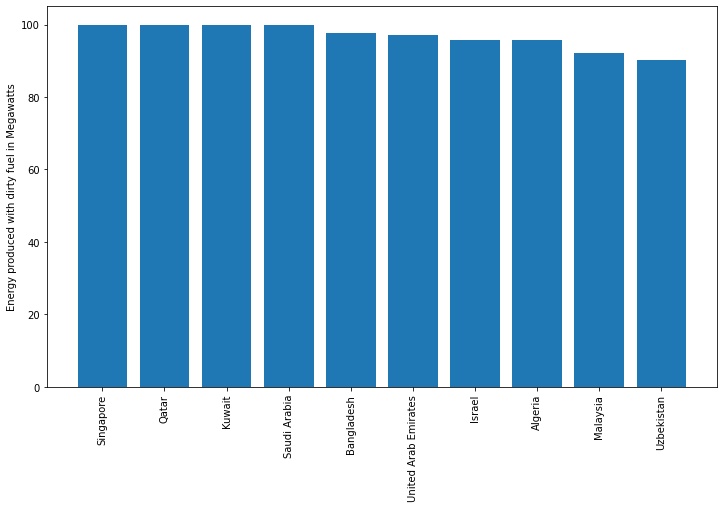

In [ ]:
# Visualization

x = top_10.index
y = top_10['%_dirty']

plt.figure(figsize= [12, 7])

plt.bar(x, y)

plt.ylabel('Energy produced with dirty fuel in Megawatts')

plt.xticks(rotation= 'vertical')

plt.show()

## Where most of the countries that generate most of their energy in a dirty way are located?

In [ ]:
## To plot in a map you need coordiantes (latitude and longitude)
## In this case I need the coordinates of the country
## I just have the coordinates of the power_plants
## Can't get the coordinates of one power plant because it could be in a territory outside the mainland, for example Kaliningrad is part of Russia but is separate from it
## So to have more appropiate coordinates I get the mean of all the plants of the country
## And this should point near the centre of the country 

# Getting mean of the coordinates

top_10['lat'] = df.groupby(['country'])[['latitude']].mean()
top_10['lon'] = df.groupby(['country'])[['longitude']].mean()

# Dictionary to save the coordinates of the countries

dic = {}

for i in top_10.values:
  dic[i[5]] = i[6]

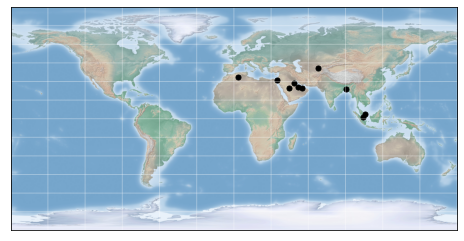

In [ ]:
# Visualization

fig = plt.figure(figsize=(8, 6), edgecolor='w')

m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
for i in dic:
  x, y = m(dic[i], i)
  plt.plot(x, y, 'ok', markersize=5)

draw_map(m)

## Which energy source generates the most energy?

In [ ]:
# Grouping the capacity of the plants by fuel

fuels = df.groupby(['primary_fuel'])[['capacity in MW']].sum()

# Number of plants that use the fuel

number_plants = df['primary_fuel'].value_counts().to_dict()

# Putting values ​​where they belong

for i in fuels.index:
  fuels.loc[i, 'number_plants'] = number_plants[i]

# Mean capacity per plant

fuels['capacity_per_plant'] = fuels['capacity in MW'] / fuels['number_plants']

fuels

,capacity in MW,number_plants,capacity_per_plant
primary_fuel,,,
Biomass,"34,281.3","1,430.0",24.0
Coal,"1,965,541.0","2,330.0",843.6
Cogeneration,"4,048.0",41.0,98.7
Gas,"1,493,050.6","3,998.0",373.4
Geothermal,"12,687.8",189.0,67.1
Hydro,"1,053,159.6","7,156.0",147.2
Nuclear,"407,911.8",195.0,"2,091.9"
Oil,"261,878.7","2,320.0",112.9
Petcoke,"2,424.6",12.0,202.0


In [ ]:
# DataFrame sorted by their capacity and getting the most known fuels to not overwhelm the viz

sorted = fuels.sort_values(by=['capacity in MW'], ascending= False).head(8)

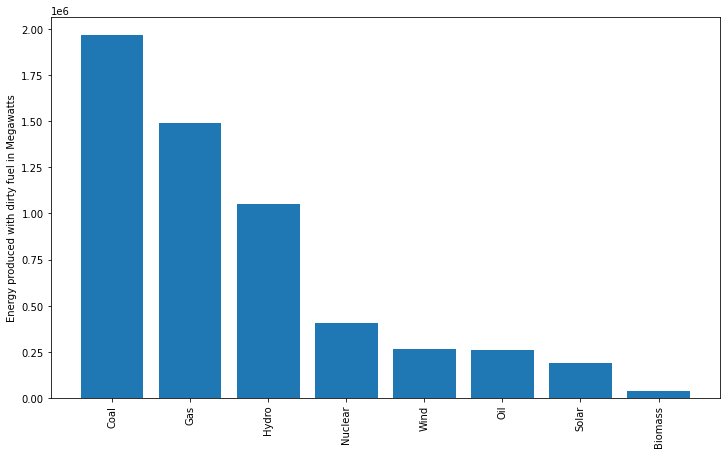

In [ ]:
# Visualization

x = sorted.index
y = sorted['capacity in MW']

plt.figure(figsize= [12, 7])

plt.bar(x, y)

plt.ylabel('Energy produced with dirty fuel in Megawatts')

plt.xticks(rotation= 'vertical')

plt.show()

## What percentage of power plants generate energy from renewable sources?

Clean is **different** than renewable, for example Nuclear fuel is clean because it only emits water steam but is not renewable because there is not infinite supply of nuclear fuel.

In [ ]:
# Adding the values of the column is renewable

renewable_sources = ['No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes']

sorted['is_renewable'] = renewable_sources

sorted

,capacity in MW,number_plants,capacity_per_plant,is_renewable
primary_fuel,,,,
Coal,"1,965,541.0","2,330.0",843.6,No
Gas,"1,493,050.6","3,998.0",373.4,No
Hydro,"1,053,159.6","7,156.0",147.2,Yes
Nuclear,"407,911.8",195.0,"2,091.9",No
Wind,"263,053.7","5,344.0",49.2,Yes
Oil,"261,878.7","2,320.0",112.9,No
Solar,"188,312.3","10,665.0",17.7,Yes
Biomass,"34,281.3","1,430.0",24.0,Yes


In [ ]:
renewables = sorted.groupby(['is_renewable'])[['number_plants']].sum()

renewables

,number_plants
is_renewable,
No,"8,843.0"
Yes,"24,595.0"


([<matplotlib.patches.Wedge at 0x7f99e8421990>,
 [Text(0.7416939242764606, 0.8123362128400925, 'No'),
  Text(-0.7416939242764609, -0.8123362128400922, 'Yes')])

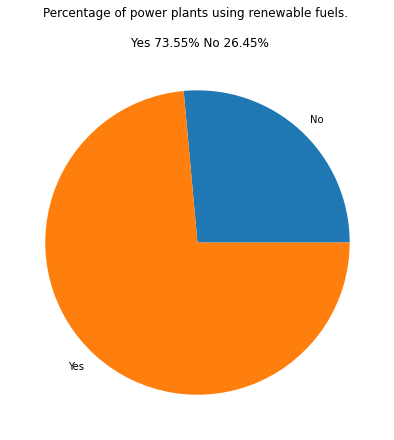

In [ ]:
# Visualization

x = renewables['number_plants']

labels = renewables.index

plt.figure(figsize= [7, 7])

plt.title('Percentage of power plants using renewable fuels. \n \n Yes 73.55% No 26.45%')

plt.pie(x, labels = labels)

## Which type of power plant is the most efficient?

In [ ]:
# Mean capacity of every fuel

sorted = fuels.sort_values(by=['capacity_per_plant'], ascending= False).head(8)

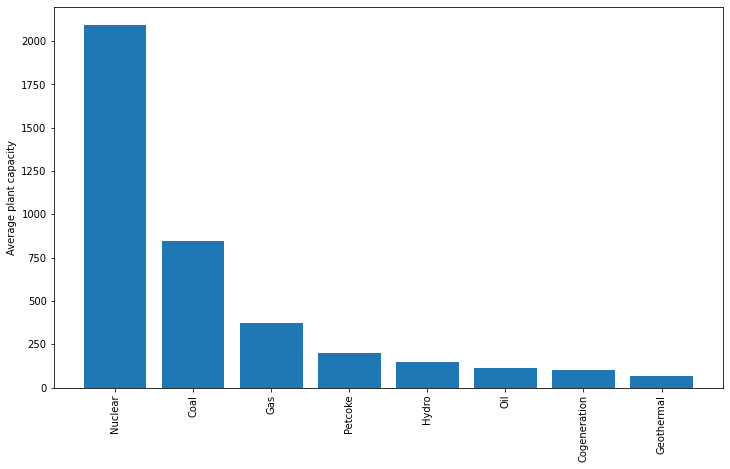

In [ ]:
# Visualization

x = sorted.index
y = sorted['capacity_per_plant']

plt.figure(figsize= [12, 7])

plt.bar(x, y)

plt.ylabel('Average plant capacity')

plt.xticks(rotation= 'vertical')

plt.show()